## [BDlensing Notes](https://www.astrobridge.org/projects/bdlensing)
### Author: **Fahim Rajit Hossain**
# Assignment W1:
Try to understand these terms as much as possible, if not already:
1. probability density,
2. standard deviation,
3. variance,
4. Poisson distribution,
5. binomial distribution,
6. Gaussian distribution, and
7. Poisson noise (or shot noise).

**Central Limit Theorem; CLT**:  Consider a random sample (observation, measurement, etc) with size $ n $ and the mean value of this sample is $ \bar{X} $. Then $ (\bar{X} - \mu) / (\sigma / \sqrt{n}) $ approaches the standard normal distribution ($ \mathcal{Z} $) as $ n \rightarrow \infty $, where $ \mu $ and $ \sigma^2 $ are the (finite) mean and variance of the population:
  \begin{equation}
    \frac{\bar{X} - \mu}{\sigma / \sqrt{n}} \sim \mathcal{Z}  \quad (\mathrm{as~} n \rightarrow \infty)~.
  \end{equation}

**Sample Variance Distribution:** Consider a random sample (observation, measurement, etc) with size $ n $ and the sample variance is $ S^2 $. Then $ (n - 1) S^2 / \sigma^2 $ follows a chi-squared distribution with degrees of freedom $ (n - 1) $, where $ \sigma^2 $ is the variance of the population:
  \begin{equation}
    \frac{(n - 1) S^2}{\sigma^2 } \sim \chi^2_{(n-1)}
  \end{equation}

**Practical Usage of the CLT**

  Consider a random sample (observation, measurement, etc) with size $ n $ large enough and the mean value of this sample is $ \bar{X} $. If $ \mu $, $ \sigma^2 $, and $ S^2 $ are the (finite) mean and variance of the population, and the sample variance, respectively:
  \begin{equation}
    \frac{\bar{X} - \mu}{S / \sqrt{{n}}} \sim T_{(n - 1)} ~.
  \end{equation}


Sometimes people empirically say $ n \ge 30 $ is enough. This really depends on the situation and I will skip this issue here. The sketch of the proof of the theorem is simple. By the definition of the $ t $-distribution and
\begin{equation}
  T = \frac{Z}{\sqrt{V /v}} = \frac{ \frac{\bar{X} - \mu}{\sigma / \sqrt{n}} }
  {\sqrt{ \frac{(n - 1) S^2}{\sigma^2 } / (n-1)}}
  = \frac{\bar{X} - \mu}{S / \sqrt{{n}}}
\end{equation}
so the theorem is plausible. For your information, the sample variance is defined as
\begin{equation}
  S^2 := \frac{1}{n - 1} \sum_{i=1}^{n} (X - \bar{X})^2
\end{equation}
and the sample standard deviation $ S $ is the square root of this.

**Coin Tossing and the CLT:** Consider a coin-tossing experiment and assign $ \pm 1 $ to heads and tails. Each experiment will give you $ \pm 1 $, but never $ 0 $. Meanwhile, we know a fair coin should have $ \mu = 0 $ (same probability of heads and tails). After $ n = 100 $ experiments, say you obtained $ \bar{X} = 0.01 $ and $ S = 0.1 $, so
  \begin{equation*}
    T = \frac{\bar{X} - \mu}{S / \sqrt{{n}}}
      = \frac{0.01 - \mu}{0.1 / \sqrt{100}}
      = 1 - 100 \mu ~.
  \end{equation*}
  Since $ T \sim t_{99} $, the significance level $ \alpha = 0.05 $ confidence interval, i.e., the confidence interval containing $ 100 (1 - \alpha) \% = 95 \% $, can be
  \begin{equation*}
    t_{99, 0.025} < T < t_{99, 0.975}
    \quad \rightarrow \quad
      - 1.9842 < 1 - 100 \mu < 1.9842
    \quad \rightarrow \quad
      \mu \in [-0.0098,\, 0.0298] ~.
  \end{equation*}
  The notation $ t_{\nu, x} $ means the input argument of the $ t $-distribution with the degrees of freedom $ \nu $ such that $ \int_{-\infty}^{t_{99, x}} h(t) dt = x $. Thus, to get the two-tail CI of significance level $ \alpha $, we need to calculate $ t_{\nu, \alpha / 2} $ and $ t_{\nu, 1 - \alpha / 2} $. For a symmetric distribution like $ t $ here, $ t_{\nu, 1 - \alpha / 2} = - t_{\nu, \alpha / 2} $. This is very widely used standard notation.
  
  If you just calculated without pondering about the meaning of the caculation, you may be surprised that your next experiment gives either $ +1 $ or $ -1 $, while the expectation is $ \mu \in [-0.0098, 0.0298] $. This is because the result from CLT is, as described, about the *mean* of the samples, not the *single sample*. Thus, the error-bar from the CLT is not necessarily predicting the possible range of *future experiments*, but it just confines the *position of the mean.*

# **Probability Distributions and Poisson Noise**

There are a myriad of probability distributions (PDs) in math, due to hard works of mathematicians lived in the era of frequentist statistics. In this section, I will just give some definitions and properties of few of them, which are frequently visited by astronomical literatures.

**Binomial Distribution**
First, let me define Bernoulli process:
Bernoulli Process: A Bernoulli process is a process (experiments) which has the following properties

1. Repeated trials where each trial (outcome) is classified as either a success (1) or failure (0).
2. The success probability ($ p $) should remain constant throughout the process.
3. Each trial (outcome) must be independent to each other.

A coin-tossing experiment can be a Bernoulli process: The probability of success (heads; H) $ p = 0.5 $ and failure (tails; T) is $ q = 1 - p = 0.5 $. Each coin-tossing is independent of each other. The probability to have the outcome ``HHT'' in this order is $ p \cdot p \cdot q = 1/8 $.

A binomial distribution arises when we describe the probability distribution of the number $ X $ which is the number of success in $ n $ Bernoulli trials (Walpole p.102).


A random variable $ X $ follows a binomial distribution ($ X \sim \mathrm{Binom}(n, p) $) has the probability distribution

$$b(x; n, p) = \binom{n}{x} p^x (1 - p)^{n - x}$$

for the success probability $ p $ of $ n $ Bernoulli trials.


For the reason why we use a word ``binomial'', see math textbooks such as Walpole p.103. This distribution has mean, variance, and standard deviation of:

**Binomial Distribution Mean and Variance**

A binomial distribution with parameters $ n $ and $ p $, it has

$$mean = np ;\quad var=npq; \quad std=\sqrt{npq}$$

Proof of Binomial Dsitribution Mean and Variance

Consider $ O_i $ is the outcome of each Bernoulli trial, i.e., 1 if success and 0 if failure, of the $ i $-th trial. Then $ X = \sum_{i=1}^{n} O_i $. The expected value of $ X $ is $ E(X) = E(\sum_{i=1}^{n} O_i) = E(O_1) + \cdots + E(O_n) $ since they are independent, and this becomes $ E(X) = np $.

For variance, we use a relationship $ \mathrm{Var}(O_i) = E(O_i^2) - (E(O_i))^2 $. But since the value $ O_i^2 $ is identical to $ O_i $, $ E(O_i^2) = E(O_i) $, so $ \mathrm{Var}(O_i) = p(1-p) \equiv pq $ for $ q := 1-p $. $ X = \sum_{i=1}^{n} O_i $ gives $ \mathrm{Var}(X) = \sum_{i=1}^{n} \mathrm{Var}(O_i) = npq $.


# Poisson Distribution

The Poisson process is a fancy naming for some special ``counting''. In astronomy, we count photons (well, actually the CCD counts the photoelectrons) over time. This is why Poisson process is dealt with so much weight in astronomy. In social sciences we can count the death toll over time, in experiments we could count the lattice of a randomly shaped crystal over the distance. A formal definition of Poisson process is

See, e.g., http://dept.stat.lsa.umich.edu/~ionides/620/notes/poisson_processes.pdf} and https://www.probabilitycourse.com/chapter11/11_1_2_basic_concepts_of_the_poisson_process.php

Poisson Process 1

The Poisson process $ N(t) $ for $ t \ge 0 $ ($ t $ can be time, distance, or similar things), with rate $ \lambda $ is defined by

1. $ N(0) = 0 $
2.  $ N(t) $ has independent increment
3.  $ N(t_2) - N(t_1) $ follows Poisson distribution of rate $ \lambda (t_2 - t_1) $ for $ t_1 < t_2 $.


The definition of Poisson distribution is given below. It can be proven that it is identical to --

Poisson Process 2

The Poisson process $ N(t) $ for $ t \ge 0 $ ($ t $ can be time, distance, or similar things), with rate $ \lambda $ is defined by

1. $ N(0) = 0 $
2. $ N(t) $ has independent increment
3. $\mathbb{P}(N(h) = 1) = \lambda h + o(h) $ for small $ h $.
4. $\mathbb{P}(N(h) \ge 2) = o(h) $ for small $ h $.

Here $ o(h) $ is any function such that $ \lim_{h \rightarrow 0} o(h) / h = 0 $. The last two items in this second definition can be re-phrased like this:

[3.] For a very small interval $ h $, the probability of one single ``counting'' (Poisson process) occurs in that interval is proportional to the length of $ h $.

[4.] For a very small interval $ h $, the probability of two or more 'counting' (Poisson process) occurs in that interval is nearly 0.

These must be independent of whether the counting happened outside of the interval, because the second item of the definition states the increment is independent.


**Poisson Distribution**

A random variable $ X $ which describes a Poisson process of rate $ \lambda $ follows the Poisson distribution ($ X \sim \mathrm{Pois}(\lambda t) $) and has the following pdf
\begin{equation}
  p(x; \lambda t) = \frac{(\lambda t)^{x}}{x!} e^{-\lambda t}
\end{equation}
for non-negative integer $ x $.

In astronomy, we are often dealing with large $\lambda t$, and for large $\lambda t$ (i.e $\lambda t \geq 0.5$) the Poisson distribution tends towards our old favourite, the Gaussian distribution, with a mean of $\lambda t$, and a standard deviation of $\sqrt{\lambda t}$,

$$P(x) = \frac{1}{ \sqrt{2\pi\sigma^2} } e^{-(x-\lambda t)^2/2\sigma^2}.$$

**Poisson Distribution Mean and Variance**

The mean, variance, and the standard deviation of the Poisson distribution $ p(x; \lambda t) $ are

  $$\mathrm{mean} = \lambda t, \quad \mathrm{var} = \lambda t, \quad \mathrm{std} = \sqrt{\lambda t} $$.

The reason we use $ \lambda t $ not just $ \lambda $ is clear from : the mean changes as $ t $ changes, and we want to express $ p(x; \mathrm{mean}) $ rather than $ p(x; \mathrm{mean} / t) $. For instance, if the photon influx is $ \lambda = {10}{\; \rm  photons / s} $, the mean of photon count is a function of time as $ \lambda t $, so for $ t = {10}{s} $, the pdf is $ p(x; {100}{\; \rm photons}) $. If the particles are distributed with mean density along the line of sight $ \lambda = {0.1}{\;\rm particle / m} $, the mean of particles along the line of sight is a function of the reaching distance $ \lambda d $, so the pdf for $ d = {5}{m} \, $ is $ p(x; {0.5}{\; \rm particles}) $. We, therefore, **frequently denote a Poisson distribution** of *mean* $ m $,  instead of *rate* $ \lambda $.


# **Usage in Astronomy**

As mentioned, photon counting is a key process in observational astronomy, and it is tightly bound to Poisson process. I will try to clarify this concept by the examples below.

**Photon Counting and Poisson Process**

The photon counting process of astronomy resembles the Poisson Process. If $ N(t) $ is the number of photons during the exposure time $ t $, it is trivial that the first two items is satisfied. The number of photons arriving in an infinitesimal time interval $ h = dt $ must be 0 or 1, but not larger than 1. To illustrate, if a total 10,000 photon should come during 10 sec of exposure, we can take $ h = 1\,\mathrm{ns} \,(\ll {10}{s} / 10,000 = {1}\,{ms}) $ to meet this condition. Thus, photon counting is a Poisson process.


In reality, however, photon counting is done by electronic devices, such as CCD. Before going deeper into the subtlety, let me give another example dealing with photon noise:

**Photon Counting and Poisson Noise**

We saw the photon counting is a Poisson process; let me further assume the photoelectron counting process on CCD is, too (photoelectrons are generated by these photons when they excite bound electrons).

For example, if we collected $ \lambda t = 10,000 $ electrons during the exposure time $ t $, the 1-$ \sigma $ uncertainty (1-$ \sigma $ CI) or the standard deviation of this counting is $ \sqrt{10,000} = 100 $, so we denote $ N = 10,000 \pm 100 $. Since the $ \lambda t $ is large enough, Thm Poisson to normal says this is just a Gaussian distribution of mean 10,000 and standard deviation 100 (1 \% of the mean). Since magnitude is $ (\mathrm{const}) - 2.5 \lg (\mathrm{count}) $, differentiation gives a first-order estimation of the uncertainty in the magnitude $ \Delta m =  | -\frac{2.5}{\ln 10} \frac{\Delta (\mathrm{count})}{\mathrm{count}} | = {0.011^m} $ (error-bar), which is small enough for some scientific purposes.

Note that the term $ \frac{\Delta (\mathrm{count})}{\mathrm{count}} = \frac{1}{\sqrt{\mathrm{count}}} $ is inversely proportional to the square root of count itself. The more we collect the count, i.e., the longer the exposure time, we will get smaller error-bar.


Now a tricky part comes in:
**Photon Counting and Poisson Noise in ADU**

In CCD, the number of photon ($ N_\gamma $) will generate certain number of photoelectrons ($ N_e $), and this is measured by the electric potential (roughly speaking, $ \mathrm{potential} = V_e \propto N_\mathrm{e} e $ where $ e $ is the electron charge). This voltage will be translated into integer numbers by electric circuit, and this integer is said to have a unit ADU (analog-to-digital unit) or DN (data number). In summary, a conversion of this order happens: $ N_\gamma \rightarrow N_e \rightarrow V_e \rightarrow N_\mathrm{ADU} $. We define the (electron) gain $ g \,[\mathrm{electrons/ADU}] $ such that $ N_e = g N_\mathrm{ADU} $.

If $ g = {2}{e/ADU} $ and $ N_e = 10,000 $ as in the previous example, $ N_\mathrm{ADU} = 5,000 $. If $ N_\mathrm{ADU} $, i.e., the ADU counting is a Poisson process, we must hace $ N_\mathrm{ADU} = 5000 \pm 71 $, which gives magnitude error $ \Delta m_\mathrm{ADU} = | -\frac{2.5}{\ln 10} \frac{71}{5000} | = {0.015} $. The error-bar has changed! What has just happened?

The key here is that we only checked the photon counting process is a Poisson process. Rigorously speaking, photoelectron counting and ADU counting are **not Poisson processes**.

**Then what process it is for photoelectron counting?**

Photoelectron Follows a Binomial Distribution

Any device which collect photon does not actually collect photon, but they output \textit{something} which is proportional to the number of photons incident to it. In CCD, the output is the number of electrons which is measured by electric potential. The key here is the \emph{conversion of photon into \emph{something} must be a probabilistic process}. In CCD, the conversion happens with a paramter called the quantum efficiency (QE). Therefore, for a fixed number of photon, $ N_\gamma $, which follows a Poisson distribution $ N_\gamma \sim \mathrm{Pois}(N_\gamma) $, the outcome, $ N_e $, will follow a binomial distribution $ N_e \sim \mathrm{Binom}(N_\gamma, QE) $. Verbally put, ``photoelectron will follow a binomial distribution with the paramter $ n $ which follows a Poisson distribution and the parameter $ p $ which is believed to be fixed thanks to engineering process''.


Although I will not give a proof, $ N_e \sim \mathrm{Binom}(n=\mathrm{Pois}(N_\gamma), p=QE) $ is approximated as $ N_e \sim \mathrm{Pois}(N_\gamma QE) $. In observation, since $ N_e \approx N_\gamma QE \gg 1 $, $ N_e \sim \mathcal{N}(N_e, N_e) $



**How about the ADU count?**


ADU is Approximately Gaussian

The ADU counting is a very strange thing: For electron gain $ g $, ADU increase by 1 for every $ g $ electrons, i.e., a step function which is very difficult to deal with in analytical sense. Regardless of its final distribution, it is clear that this conversion to the original $ N_e $ will destroy the original distribution. Fortunately, the count $ N_e $ or $ N_\mathrm{ADU} $ is large enough in most observations, so that the discreteness of conversion is ignorable. Hence, we can treat them as if a smooth continuous convertable variables by $ N_e = g N_\mathrm{ADU} $. Then


  $$N_\mathrm{ADU} \sim  \mathcal{N}(N_e/g, N_e/g^2) \quad\mathrm{or}\quad
  N_\mathrm{ADU} \sim \mathcal{N}(N_\mathrm{ADU}, N_\mathrm{ADU}/g)$$


That means $ N_\mathrm{ADU} $ follows a Gaussian, but not like usual Poisson distribution (because ADU counting is not a Poisson process). Going back to Ex \ref{ex: poisnoise adu}, we have to divide the error-bar of the count by the gain, so $ \Delta m_\mathrm{ADU} = | -\frac{2.5}{\ln 10} \frac{\sqrt{5000/g}}{5000} | = {0.011} $, which is identical result as Ex Poisson noise.


For a mathematical treatment of the ADU conversion (step function), you may find some research papers useful

See, e.g., Merline W. J. \& Howell S. B. 1995, Exp. Astron. **6**, **163**, ``A REALISTIC MODEL FOR POINT-SOURCES IMAGED ON ARRAY DETECTORS: THE MODEL AND INITIAL RESULTS''.}.



# **Assignment W2:**
**Write a Python code that counts how many times the head has come up after $N = 200$ coin tosses, with each toss having a $40\%$ probability for the head and a 60% probability for the tail.**

In [ ]:
import random

def coin_toss():
    if random.random() < 0.5:
        return "Heads"
    else:
        return "Tails"

N = 200
heads_count = 0

for i in range(N):
    result = coin_toss()
    if result == "Heads":
        heads_count += 1

print("Number of heads after", N, "tosses:", heads_count)

Number of heads after 200 tosses: 100


## Assignments for week 1 (Feb 12–17)

Think about one experiment where you toss a coin for $N_{trial} = 200$ times, with each toss having a $50\%$ probability for the head. In this experiment, you count the total number of heads Nhead. Write a python code that gives you $N_{head}$. This is a random number and should provide a different number if the experiment is run again.

In [ ]:
import random

Ntrial = 200
Nhead = 0

for i in range(Ntrial):
    if random.random() < 0.5:
        Nhead += 1

print("Total number of heads:", Nhead)


Total number of heads: 99


Now run this experiment 1000 times. Plot a histogram of the 1000 Nhead values from these 1000 experiments. What distribution does the histogram look like?

Mean of Nhead: 100.355
Standard deviation of Nhead: 7.11174908162542


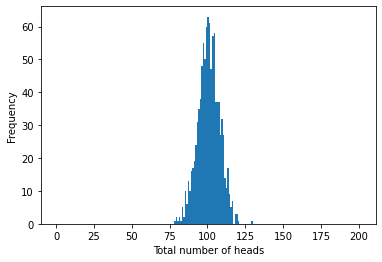

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

Ntrial = 200
Nexp = 1000
Nhead_list = []

for j in range(Nexp):
    Nhead = 0
    for i in range(Ntrial):
        if random.random() < 0.5:
            Nhead += 1
    Nhead_list.append(Nhead)

mean = np.mean(Nhead_list)
std = np.std(Nhead_list)

print("Mean of Nhead:", mean)
print("Standard deviation of Nhead:", std)

plt.hist(Nhead_list, bins=range(Ntrial+2))
plt.xlabel("Total number of heads")
plt.ylabel("Frequency")
plt.show()



The expected mean and standard deviation for the Binomial distribution can be calculated using the formulas:

$$mean = N_{trial} \times p=200 \times 0.5= 100 $$

$$std = \sqrt{N_{trial} \times p \times (1 - p)}=\sqrt{200 * 0.5 * 0.5} = 7.07 $$

Now, think about a coin for which the probability of a head is 0.1%. You toss the coin $N_{trial} = 10000$ times for one experiment. If you repeat the experiment 1000 times, what does the distribution look like? Take the mean and standard deviations of the 1000 $N_{head}$ values. Do they match the predicted mean and standard deviation of the Poisson distribution?


min and max numbers of heads from all the trails: 67 and 129
Mean of Nhead: 99.694
Standard deviation of Nhead: 10.017702531019776


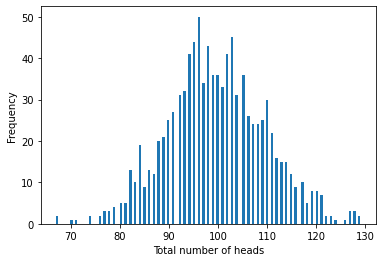

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

Ntrial = 100000
Nexp = 1000
Nhead_list = []

for j in range(Nexp):
    Nhead = 0
    for i in range(Ntrial):
        if random.random() < 0.001:
            Nhead += 1
    Nhead_list.append(Nhead)

minHead=min(Nhead_list)
maxHead=max(Nhead_list)

print(f"min and max numbers of heads from all the trails: {minHead} and {maxHead}")
mean = np.mean(Nhead_list)
std = np.std(Nhead_list)

print("Mean of Nhead:", mean)
print("Standard deviation of Nhead:", std)

plt.hist(Nhead_list, bins=maxHead)
plt.xlabel("Total number of heads")
plt.ylabel("Frequency")
plt.show()

The Poisson distribution represents the number of occurrences of an event in a fixed interval of time or space, where the event is rare, random, and independent. It is characterized by a single parameter $\lambda$, which is the expected number of occurrences in the interval.

In this case, the expected number of heads in a single toss is $p = 0.001$. Therefore, the expected number of heads in $N_{trial}= 100000$ tosses is  $\lambda = N_{trial} * p = 10$. The Poisson distribution with $\lambda = 10$ can be used to predict the expected distribution of Nhead.
$$Mean = \lambda= 100$$
$$std = \sqrt{\lambda}=\sqrt{100}=10$$

***5. If you have counted the number of customers between 7-8pm to be 100 today, what is the expected number and uncertainty for tomorrow 7-8pm?***

Assuming that the average probability for one resident in Dhaka city to visit the Star Kabab restaurant between 7-8pm is constant, the number of customers visiting the restaurant on different days between 7-8pm can be modeled by a Poisson distribution.

The Poisson distribution has a single parameter, lambda ($\lambda$), which represents the average rate of occurrence of the events. In this case, lambda represents the average number of customers expected to visit the restaurant between 7-8pm.

If we have counted the number of customers between 7-8pm to be 100 today, then the expected number of customers for tomorrow between 7-8pm is also $\lambda$ = 100, assuming that the average probability for one resident in Dhaka city to visit the restaurant between 7-8pm is the same as it was today.

**6. If you have counted the number of customers between 7-8pm to be 100 today, what is the expected number and uncertainty for tomorrow 7-8pm?**

The uncertainty for the number of customers tomorrow can be calculated using the formula for the standard deviation of a Poisson distribution, which is equal to the square root of lambda. Therefore, the uncertainty for the number of customers tomorrow between 7-8 pm is $\sqrt{100} = 10$.

This means that we can expect the number of customers tomorrow to be centered around 100, with an uncertainty of 10 customers. So, there is a high probability that the number of customers will be between 90 and 110, but there is a smaller probability of getting a larger or smaller number of customers than that range.


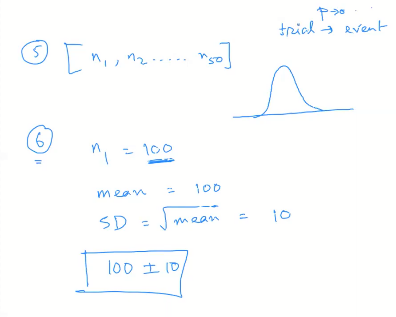




**Bayes Theorem (In context of Astronomy):** https://slittlefair.staff.shef.ac.uk/teaching/phy241/lectures/l10/

**MCMC: A (very) Beginnner’s Guide** [link](https://prappleizer.github.io/Tutorials/MCMC/MCMC_Tutorial.html)

**Linear Regression MCMC [Fahim]**: https://colab.research.google.com/drive/1fmShoeiMfbS0jY9vPTJ3yVCHL2eXLSvI?usp=sharing

# Assignments for week 2 (Feb 19–26)

Find out your preferred name’s alphabetical order within your team. Retrieve your specific data file for your team number and order number here: https://drive.google.com/drive/folders/11ukgOh-Lal2K58fLnshbD1kM6WRS-b75?usp=share_link . You can read the data file using `numpy.loadtxt()` function. The file contains a 2D image of an elliptical galaxy. In other words, each pixel contains a flux value. The point spread function (PSF) is a Gaussian with 0.3 arcsecond FWHM. Plot `numpy.log10(image)` using the `matplotlib.pyplot.matshow()` function. Each pixel size is **0.05** arcsecond. How large is the full image in the arcsecond unit?

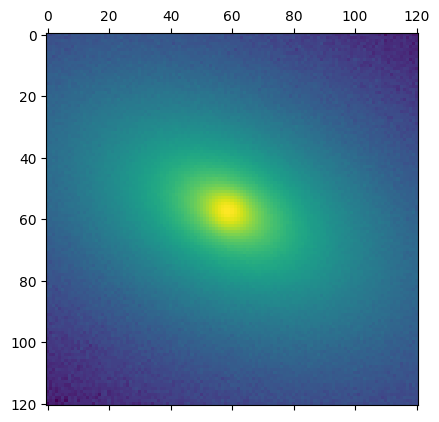

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the image data from file
image = np.loadtxt("/content/team_8_order_3(W2).txt")

# Define the FWHM of the PSF
fwhm = 0.3 # arcseconds

# Calculate the standard deviation of the Gaussian PSF
sigma = fwhm / (2*np.sqrt(2*np.log(2)))

# Convolve the image with the PSF using Gaussian filter
from scipy.ndimage import gaussian_filter
image_convolved = gaussian_filter(image, sigma)

# Apply the logarithm function to the image
image_log = np.log10(image_convolved)

# Plot the logarithm of the convolved image using matshow
plt.matshow(image_log)

# Show the plot
plt.show()


**Each pixel size is 0.05 arcsecond. How large is the full image in the arcsecond unit?**

As we can see from above image that the size of the image is 120x120. So the size of the image is
$$120 \times 0.05''=6''$$

**The unit of each pixel’s flux value is electron/second. The total exposure time for this image is 600 seconds. What is the noise level in each pixel in the electron/second unit? Plot the signal-to-noise ratio map for the image using `matshow()`.**

To calculate the noise level in each pixel of the image, one can use the fact that the noise in the image follows Poisson statistics, which means that the variance of the pixel values is equal to their mean. The mean pixel value is simply the flux value in electrons/second multiplied by the exposure time, which gives the total number of electrons collected in each pixel during the exposure. Therefore, the variance of each pixel is equal to the product of the mean and the exposure time. The noise level in each pixel is then simply the square root of the variance.

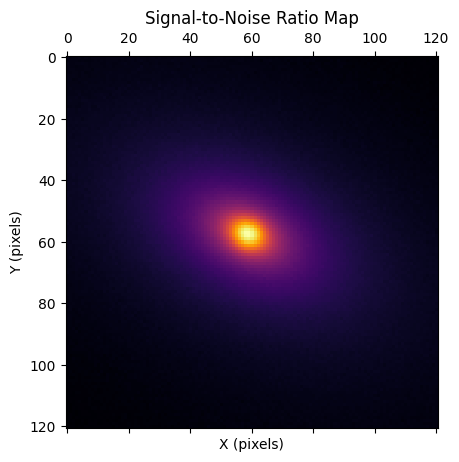

In [ ]:
# Calculate the noise level in each pixel in electron/second unit
exposure_time = 600 # seconds
mean_electrons = image_convolved * exposure_time
var_electrons = mean_electrons
noise_electrons = np.sqrt(var_electrons)

# Convert the noise level to electron/pixel/second unit
noise_level = noise_electrons / exposure_time

# Calculate the signal-to-noise ratio (SNR) map
snr_map = image_convolved / noise_level

# Plot the SNR map using matshow
plt.matshow(snr_map, cmap='inferno')
plt.title('Signal-to-Noise Ratio Map')
plt.xlabel('X (pixels)')
plt.ylabel('Y (pixels)')

# Show the plot
plt.show()

6. Model the flux distribution in the image using an elliptical Sersic function. Don’t forget the PSF in your model. You will need to find the uncertainties of the model parameters using MCMC. Fix $n_{Sersic} = 4$ in your model, but find the best-fit values for other parameters. The other model parameters and their priors are:

* x-centroid, $x_0$: prior up to you to choose

* y-centroid, $y_0$: prior up to you to choose

* scale radius, $R_{Sersic}$: uniform between 0 arcsec and 3 arcsec

* axis ratio, $q$ : uniform between 0.4 and 1

* position angle, $\phi$:  uniform between 0 and $\pi$

* amplitude: prior is up to you to choose


$$ I(R)=I_{e}\exp \left\{-b_{n}\left[\left({\frac {R}{R_{e}}}\right)^{1/n}-1\right]\right\}$$

$$R= \sqrt{(x-x_0)^2\times q+\frac{(y-y_0)^2}{q}}$$
$$q=\frac{b}{a}$$


Both the lens galaxy's and the source galaxy's light profiles are modeled
with Sersic function, which is given by:

$$I(x, y) = I_{\rm e} \exp \left[ -b_{n} \left\{ \left( \frac{\sqrt{qx^2
+ y^2/q}}{R_{\rm eff}} \right)^{1/n_{\rm s}} - 1 \right\}
\right].$$

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv("/content/team_8_order_3(W2).txt", header=None, sep=' ')



# Week 2 solution
thanks to Imtiaz (SUST, HSC17)

14641

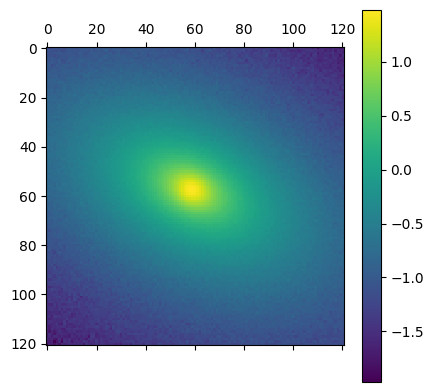

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

image = np.loadtxt('/content/team_8_order_3(W2).txt')

plt.matshow(np.log10(image))
plt.colorbar()


np.size(image)

## Plotting the signal to ratio map

[[6.71546376 5.83968321 6.4440365  ... 3.79946019 3.28558163 3.31982454]
 [6.45414323 6.87826225 6.91543112 ... 4.40721972 4.00592279 3.81194707]
 [7.23756749 6.79967376 6.90576618 ... 3.93139444 4.12410501 3.76619186]
 ...
 [4.1368257  3.62600292 4.13564381 ... 6.78662037 6.65526412 6.44954382]
 [3.57688142 3.40963259 3.74672942 ... 5.93990953 6.55606564 5.97320378]
 [2.62725954 3.70480683 3.56976284 ... 6.05353303 6.41250423 6.14845744]]
[[6.71546376 5.83968321 6.4440365  ... 3.79946019 3.28558163 3.31982454]
 [6.45414323 6.87826225 6.91543112 ... 4.40721972 4.00592279 3.81194707]
 [7.23756749 6.79967376 6.90576618 ... 3.93139444 4.12410501 3.76619186]
 ...
 [4.1368257  3.62600292 4.13564381 ... 6.78662037 6.65526412 6.44954382]
 [3.57688142 3.40963259 3.74672942 ... 5.93990953 6.55606564 5.97320378]
 [2.62725954 3.70480683 3.56976284 ... 6.05353303 6.41250423 6.14845744]]


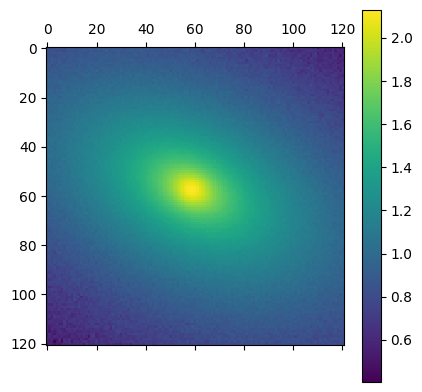

In [ ]:
exposure_time = 600
mean_value = image * exposure_time
noise_level = np.sqrt(mean_value)
print(noise_level)

snr = image / (noise_level / exposure_time)
print(snr)

plt.matshow(np.log10(snr))
plt.colorbar()

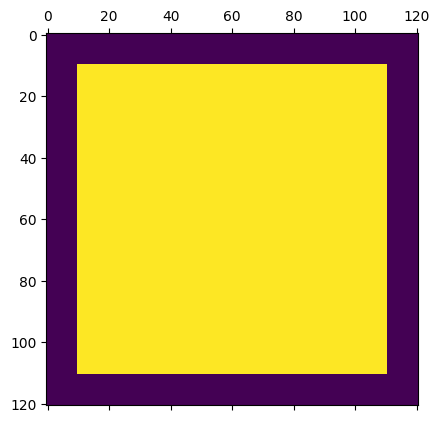

In [ ]:
mask = np.zeros_like(image)

mask[10:-10, 10:-10] = 1

plt.matshow(mask)

*Unsure why the mask is used*

**ChatGPT says**

You then set certain values of mask to 1 using mask[10:-10, 10:-10] = 1. This creates a square "mask" region in the center of the image, with a width and height of 10 pixels on each side.

This type of mask is commonly used in image processing to selectively apply operations to specific regions of an image, while leaving other regions unaffected. The mask can be used to filter, enhance or manipulate the image pixels within the masked region, while leaving the rest of the image untouched.



## Sersic Light Profile

In [ ]:
from astropy.convolution import Gaussian2DKernel, convolve
from astropy.modeling.models import Sersic2D
from numpy import sqrt

def get_sersic_2d(amp, r_eff, x_0, y_0, q, phi):

    x,y = np.meshgrid(np.arange(121), np.arange(121))

# each pixel size is 0.05px
    model_sersic_2d = Sersic2D(amplitude=amp,
                               r_eff= r_eff / 0.05,
                               x_0=x_0 / 0.05,
                               y_0=y_0 / 0.05,
                               ellip=1-q,
                               theta=phi)

    sersic_image = model_sersic_2d(x, y)

    # define the PSF
    psf_size = 6/2.335

    psf = Gaussian2DKernel(psf_size)

    convolved_image = convolve(sersic_image, psf)

    return convolved_image

def get_log_likelihood(params):
    """
    Compute the log likelihood value.
    :param params: array containing model parameters
    :type params: np.array
    :return: log likelihood value
    :rtype: float
    """
    # write code
    amp, r_eff, x_0, y_0, q, phi = params

    sigma = noise_level / 600

    convolved_image = get_sersic_2d(amp, r_eff, x_0, y_0, q, phi)

    return -0.5 * np.sum(((image - convolved_image) ** 2 / sigma**2) * mask)


def get_log_prior(params):
    """
    Get the log prior value.
    :param params: array containing model parameters
    :type params: np.array
    :return: log prior value
    :rtype: float
    """
    # write code

    amp, r_eff, x_0, y_0, q, phi = params

    if not 0. < x_0 < 6.:
        return -np.inf

    if not 0. < y_0 < 6.:
        return -np.inf

    if not 0.4 < q < 1.0: #got this
        return -np.inf

    if not 0 < phi < np.pi: #got this
        return -np.inf

    if not 0.0 < amp:
        return -np.inf

    if not 0.0 < r_eff < 4.0:
        return -np.inf

    return 0.



def get_log_posterior(params):
    """
    Compute the log posterior value.
    :param params: array containing model parameters
    :type params: np.array
    :return: log posterior value
    :rtype: float
    """

    amp, r_eff, x_0, y_0, q, phi = params

    log_prior = get_log_prior(params)

    if np.isinf(log_prior):
        return -np.inf
    else:
        return get_log_likelihood(params) + log_prior

# MCMC

In [ ]:
!pip install emcee

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 KB 2.4 MB/s eta 0:00:00


In [ ]:
import emcee # import the emcee package

init_params = np.array([1.36, 1.2, 2.9, 2.85, 0.600, 0.46]) #still not getting how these values came into being
num_step = 1000
num_walkers = 40
num_params = len(init_params)
init_walker_positions = np.random.normal(loc=init_params, scale=1e-4,
                                        size=(num_walkers, num_params))

sampler = emcee.EnsembleSampler(num_walkers, num_params,
                                get_log_posterior)

sampler.run_mcmc(init_walker_positions, num_step, progress=True);

100%|██████████| 1000/1000 [09:25<00:00,  1.77it/s]


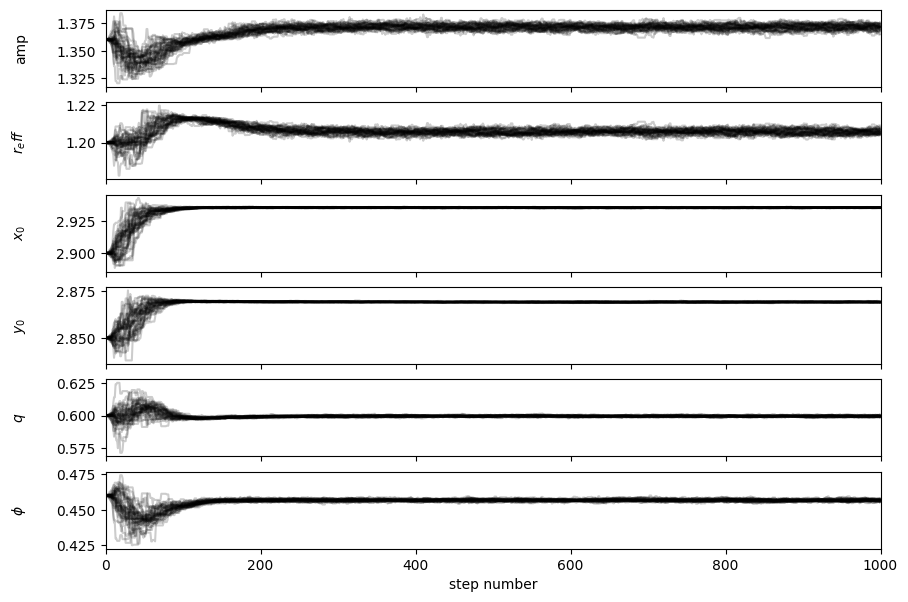

In [ ]:
fig, axes = plt.subplots(num_params, figsize=(10, 7), sharex=True)

samples = sampler.get_chain()
labels = ['amp', '$r_eff$', '$x_0$', '$y_0$', '$q$', '$\phi$'] # make a list of strings for the labels of your model parameters

for i in range(num_params):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.2)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [ ]:
from IPython.display import display, Math

discard = 200
flat_samples = sampler.get_chain(discard=discard, thin=1, flat=True)

for i in range(num_params):
    percentile_16, median, percentile_84 = np.percentile(
        flat_samples[:, i], [16, 50, 84])

    text = "\mathrm{{{3}}} = {0:.4f}_{{-{1:.4f}}}^{{+{2:.4f}}}"
    text = text.format(median,
                       median - percentile_16,
                       percentile_84 - median,
                       labels[i])
    display(Math(text))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


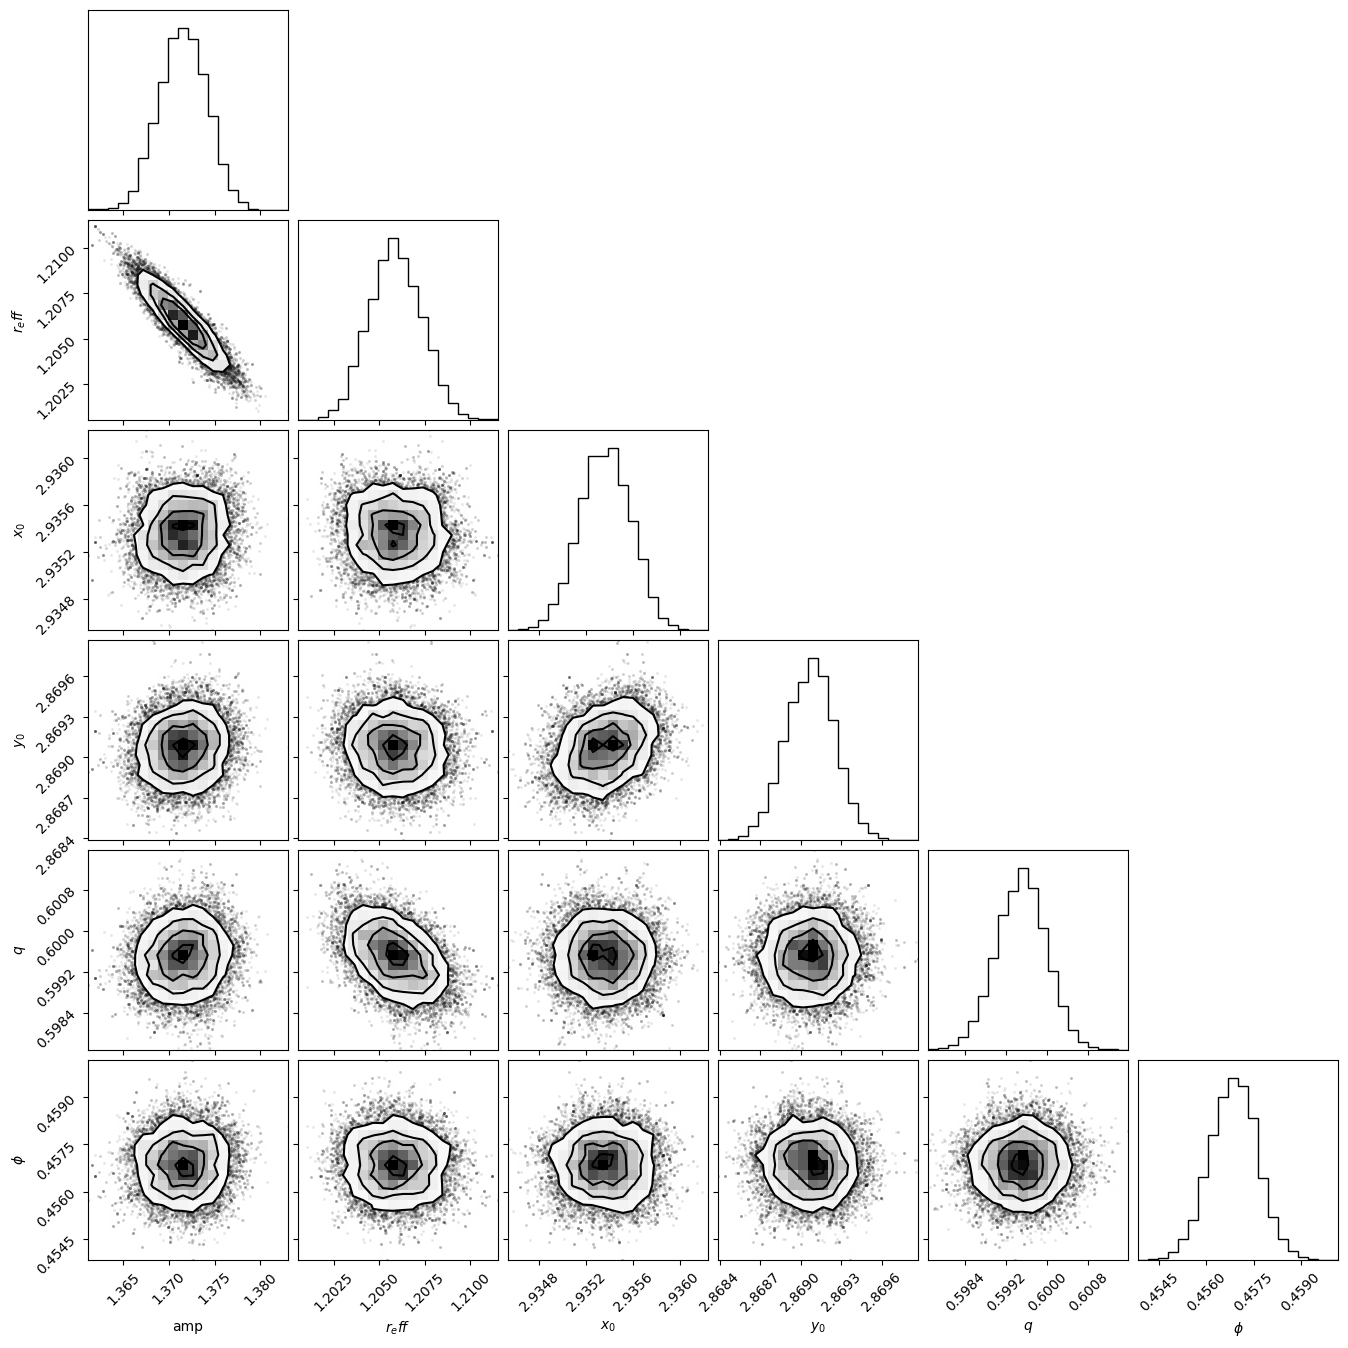

In [ ]:
!pip install corner
import corner

corner.corner(flat_samples, labels=labels);

## 7. Make a residual plot, where,

$$\rm residual =  \frac{(image - model)}{noise\; Level}$$

Choose the colormap "RdBu_r" and set `vmax = 3, vmin = -3` in the `matshow()` function. What’s the chi-squared ($\chi^2$) value for your fit? What’s the reduced chi-squared?

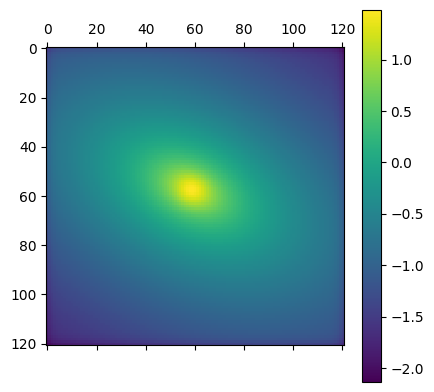

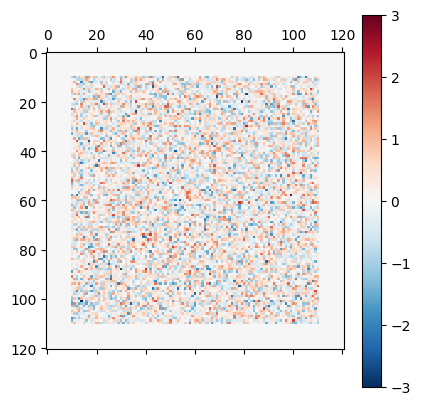

In [ ]:
best_fit_params = np.median(flat_samples, axis=0)

best_fit_image = get_sersic_2d(*best_fit_params)

plt.matshow(np.log10(best_fit_image))
plt.colorbar()
plt.show()


plt.matshow(((image - best_fit_image) / (noise_level/600)) * mask, cmap='RdBu_r', vmax = 3, vmin = -3)
plt.colorbar()
plt.show()

# Note on $\chi^2$

In astronomy, often quantities vary continuously as a function of time, for
example the radial velocity measurements. In this
case it is impossible to make repeated measurements of the identical
quantity. Instead, the empirical data consist of a time series: a set
{$x_i,\; \sigma_i,\; t_i$} of individual measurements ($x_i$), estimated uncertainty on each measurement ($\sigma_i$) and the time of the measurement ($t_i$). To this time series the astronomer will fit a function or model. Ideally, the choice of model is motivated by an understanding of the physics underlying the variation of the quantity being measured. For instance, our understanding of orbital motion, and relates the fundamental parameters of a planetary system to the (measurable) reflex radial velocity of the host star.

For any set of assumed parameters, we can use the model to calculate
predicted values, $\mu_i$, to compare with the measurements $x_i \pm \sigma_i$. The appropriate way to gauge the goodness of the fit of a model with a particular set of parameters is to calculate a statistical quantity called $\chi^2$ given by
$$\chi^2=\sum_i \left(\frac{x_i-\mu_i}{\sigma_i}\right)^2$$

*You may have heard of it, or simply the least square something. Least square or the chi-square minimization is a process to
find the set(s) of model parameters which has the biggest (or bigger than threshold) likelihood in Bayesian statistics.*

Here the sum is over all the measurements in the set of data. If a particular
measurement has a large uncertainty estimate, then the denominator is large,
and the contribution to $\chi^2$ is relatively small, even if the deviation between the measured value, $x_i$, and the corresponding model prediction, $\mu_i$, is large. Because the quantity $x_i - \sigma_i$ is squared, positive and negative deviations make equally weighted positive contributions to $\chi^2$. If a model agrees well with the data, the deviations should be small, and consequently the best-fitting model is the one with the minimum value of $\chi^2$. Model fitting in astrophysics is generally accomplished by a process of $\chi^2$ minimization, as outlined below.

- Measure empirical data {$x_i,\; \sigma_i,\; t_i$}
- Adopt a physically motivated model that can predict values, $\mu_i$, for the measured quantity, $x_i$, for given physical parameters
- For a particular choice of input parameter values, calculate $\chi^2$ and
record its value; repeat this step for a new choice of input parameter
combinations; repeat until all plausible parameter combinations have
been covered.
- Adopt the set of input parameters that produces the minimum $\chi^2$.

The reduced chi-square is an important metric because it allows us to compare the goodness of fit of different models with different numbers of parameters. Models with lower reduced chi-square values generally provide better fits to the data. Additionally, a reduced chi-square value close to 1 indicates a good fit, while values much larger than 1 indicate that the model does not adequately explain the data.

## $\chi^2$ & Reduced $\chi^2$

In [ ]:
chi_square = np.sum(((image - best_fit_image) / (noise_level/600)) ** 2)

reduced_chi_square = chi_square / (np.size(image) - num_params)

print(chi_square)
print(reduced_chi_square)

14032.346943001306
0.95882110987368


## 8. What is the half-light radius or the effective radius of this galaxy?

### Value of R_sersic

In [ ]:
from numpy import sqrt

q = 0.6
r_eff = 1.2
r_sersic = sqrt(q) * r_eff

r_sersic

0.92951600308978

## **Notes:**

#### **1. What is FWHM and how it is related to the standard deviation $\sigma$?**
The Full-Width at Half-Maximum (FWHM) is a measure of the width of a function, defined as the distance between the two points on the function where the function reaches half of its maximum value.


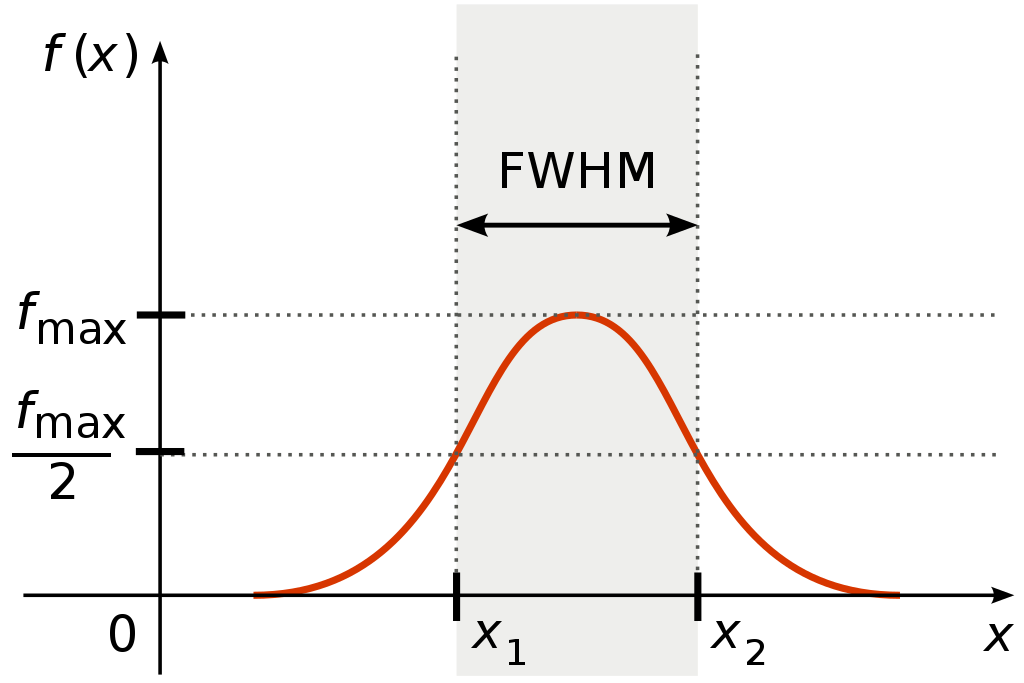

The standard deviation $\sigma$ of a Gaussian distribution determines its width. The FWHM of a Gaussian distribution can be related to its standard deviation $\sigma$ as follows:

Let $f(x)$ be a Gaussian distribution with mean $\mu$ and standard deviation $\sigma$:

$$f(x) = \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

The maximum value of $f(x)$ is at $x=\mu$, where $f(\mu) = 1/\sqrt{2\pi}\sigma$. Half of the maximum value is at $f(\mu \pm \text{FWHM}/2)$:
$$
\begin{align}
f(\mu \pm \text{FWHM}/2) &= \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{(\mu \pm \text{FWHM}/2 - \mu)^2}{2\sigma^2}} \\
&= \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{(\text{FWHM}/2)^2}{2\sigma^2}} \\
&= \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{(\text{FWHM}^2/4)}{2\sigma^2}} \\
&= \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{\text{FWHM}^2}{8\sigma^2}}
\end{align}
$$

Solving for $\text{FWHM}$:
$$
\begin{align}
\frac{f(\mu)}{2} &= f(\mu \pm \text{FWHM}/2) \\
\frac{1}{2\sqrt{2\pi}\sigma} &= \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{\text{FWHM}^2}{8\sigma^2}} \\
\frac{1}{2} &= e^{-\frac{\text{FWHM}^2}{8\sigma^2}}
\end{align}
$$

Taking the natural logarithm of both sides, we get:

$$
\begin{align}
\ln \frac{1}{2} &= -\frac{\text{FWHM}^2}{8\sigma^2} \\
\text{FWHM}^2 &= -8\sigma^2 \ln \frac{1}{2} \\
\text{FWHM} &= 2\sqrt{2\sigma^2 (-\ln 2)} \\
&= \sigma \sqrt{8\ln 2}
\end{align}
$$

Solving for $\text{FWHM}$, we get:

$$\text{FWHM} = \sigma\sqrt{8\ln 2} \approx 2.355\sigma$$

Therefore, the FWHM of a Gaussian distribution is approximately $2.355$ times its standard deviation $\sigma$.

#### **2. What is the difference between scale radius ($R_{sersic}$) and effective radius ($R_{eff}$)?**



Scale radius ($R_{sersic}$) and effective radius ($R_{eff}$) are both parameters used to describe the properties of galaxies, but they measure different things.

The Sersic profile is a mathematical function commonly used to describe the surface brightness distribution of galaxies. The Sersic profile is given by:

$$I(r) = I_e \exp[-b_n ((r/r_e)^{1/n} - 1)]$$

where $I(r)$ is the surface brightness at radius $r$, $I_e$ is the surface brightness at the effective radius $r_e$, $n$ is the Sersic index (which describes the shape of the profile), and $b_n$ is a constant that depends on $n$. The scale radius $R_{sersic}$ is a parameter in the Sersic profile that describes the radius at which the profile transitions from an exponential ($n=1$) to a more centrally concentrated ($n>1$) form. It is related to the effective radius $R_{eff}$ and the Sersic index $n$ by:

$$R_{sersic} = R_e \cdot (2n)^{\frac{1}{2n}}$$

The effective radius $R_{eff}$, on the other hand, is a measure of the size of a galaxy. It is defined as the radius within which half of the total light from the galaxy is emitted. Mathematically, we can write:

$$\frac{1}{2} \int_{0}^{R_{eff}} 2 \pi r I(r) dr = \frac{1}{2} \int_{0}^{\infty} 2 \pi r I(r) dr$$

where the integral on the left-hand side is the total amount of light within $R_{eff}$, and the integral on the right-hand side is the total amount of light from the galaxy.

In other words, $R_{sersic}$ is a parameter in the mathematical function used to describe the surface brightness distribution of a galaxy, while $R_{eff}$ is a measure of the physical size of the galaxy based on the amount of light it emits. Both parameters are important for studying the properties and evolution of galaxies.



## Week 5 [Completed]

1. Check out this [notebook by Fahim](https://colab.research.google.com/drive/1kLZcR5L13ghbIBQ6rpFrdtJb1SqGOpet?usp=sharing) and try to develop an intuition for how different parameters involved in a lensing system can change the look of the system. Create a perfectly round Einstein ring by appropriately choosing the slider values in the section “Simulating a lens system.” In the section “Demonstration of lens modeling by tuning parameters by hand”, try to achieve a reduced $\chi^2$ as close to 1 as possible. If you want to look at the right answers, they’re given here.

2. Work with the notebook [Intro to lens modeling with lenstornomy [Fahim].ipynb](https://colab.research.google.com/drive/1gK21vVH1YyC2ldpPQurIZ3hb5yH8dANy?usp=sharing). Fit the lensing system given to you (that matches your team number and order) last week in this folder. The fitting is done well when you get a reduced $\chi^2$ very close to 1.

3. Run an MCMC after the PSO. Ensure that the MCMC chain has converged. Obtain the best-fit values and uncertainties for $\theta_E$ and $\gamma$.



#[ Week 6](https://docs.google.com/document/d/1c5iN2kcOZpD8nVdWFuEffpaHTU1Uq0yEINJccaV6i6Q/edit#heading=h.3s9tgalrqjp) [Completed]

## [**Fahim's Collab**](https://colab.research.google.com/drive/1hrksIok850psvUonGpLRaVEamwJStnWG?usp=sharing)

1. State your name and the people you got help from for this assignment at the top of the notebook in a Markdown cell.

2. Check this notebook to see how to read the *.h5 files: https://drive.google.com/file/d/1krIFwO_CW2GRsxp-hNm6kGWsZ0iBtQKZ/view?usp=sharing.
3. Make sure the appropriate PSF is being provided to lenstronomy through `kwargs_psf`.
4. You need to add external shear to the `lens_model_list` with the profile name ‘SHEAR’. The free parameters in this profile are: ‘gamma1’ and ‘gamma2’, and the fixed parameters are ‘ra_0’: 0, ‘dec_0’: 0. The upper and lower values for ‘gamma1’ and ‘gamma2’ are 0.3 and -0.3. (lenstronomy documentation: https://lenstronomy.readthedocs.io/en/latest/lenstronomy.LensModel.Profiles.html#lenstronomy.LensModel.Profiles.shear.Shear)
5. You need to add the ‘SHAPELETS’ light profile to the `source_model_list`. The free parameters are ‘beta’, ‘center_x’, and ‘center_y’. But, ‘center_x’ and ‘center_y’ needs to be joined with the ‘center_x’ and ‘center_y’ of the Sersic light profile in the `source_model_list`. The fixed parameter is ‘n_max’, you can try values between 4 and 6 for the fixed value of ‘n_max’. (lenstronomy documentation: https://lenstronomy.readthedocs.io/en/latest/lenstronomy.LightModel.Profiles.html#module-lenstronomy.LightModel.Profiles.shapelets)
5. To submit the notebook, upload it to Google Colab and share the link with me on Slack.
